In [1]:
import spnutils
import embedding
import crv

### Find suitable field for polynomial interpolation

In [2]:
SKINNY_S4 = [0xc, 0x6, 0x9, 0x0, 0x1, 0xa, 0x2, 0xb, 0x3, 0x8, 0x5, 0xd, 0x4, 0xe, 0x7, 0xf]
fields, non_zero = spnutils.find_field_for_sparse_interpolation(4, list(range(16)), SKINNY_S4)
print(f'Best: {non_zero} non-zeros')
for f in fields:
    print(f'modulus: {f.modulus()}')

Best: 14 non-zeros
modulus: x^4 + x^3 + 1


In [3]:
SKINNY_S4_inv = [0x3, 0x4, 0x6, 0x8, 0xc, 0xa, 0x1, 0xe, 0x9, 0x2, 0x5, 0x7, 0x0, 0xb, 0xd, 0xf]
fields, non_zero = spnutils.find_field_for_sparse_interpolation(4, list(range(16)), SKINNY_S4_inv)
print(f'Best: {non_zero} non-zeros')
for f in fields:
    print(f'modulus: {f.modulus()}')

Best: 13 non-zeros
modulus: x^4 + x + 1
modulus: x^4 + x^3 + 1


### Find suitable embedding

In [4]:
x = polygen(GF(2), 'x')
Y = polygen(GF(2), 'Y')
F4 = GF(2**4, name='x', modulus=x**4 + x**3 + 1)
F40 = GF(2**40, name='Y', modulus=Y^40 + Y^20 + Y^15 + Y^10 + 1)

In [5]:
emb, _ = embedding.find_min_cost_embedding(F4, F40)
print(emb)

Embedding from Finite Field in x of size 2^4 to Finite Field in Y of size 2^40 via Y^35 + Y^20 + Y^5 + 1


In [6]:
print('Forward embedding')
print(emb.bit_embedding())

print('Inverse embedding')
print(emb.inverse_bit_embedding())

Forward embedding
[1 1 1 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 1 1 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 1]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 1 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 1 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 1]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[0 1 0 0]
Inverse embedding
([1 1 0 0]
[0 1 0 1]
[0 0 0 1]
[0 0 1 0], [0, 5, 10, 15])


In [7]:
print(spnutils.gf_squaring(F4))

[1 0 1 1]
[0 0 0 1]
[0 1 0 1]
[0 0 1 1]


In [9]:
SKINNY_S4_F = [spnutils.natural_encoding(F4, x) for x in SKINNY_S4]
SKINNY_S4_inv_F = [spnutils.natural_encoding(F4, x) for x in SKINNY_S4_inv]

### MUL

In [11]:
c = spnutils.interpolate(F4, [spnutils.natural_encoding(F4, i) for i in range(16)], SKINNY_S4_F)
s = " + ".join(f'0x{spnutils.natural_encoding_to_int(ci):x} z^{i}' for i,ci in enumerate(c) if c != 0)
print(s)

0xc z^0 + 0x8 z^1 + 0x3 z^2 + 0xd z^3 + 0xf z^4 + 0x4 z^5 + 0x8 z^6 + 0x6 z^7 + 0x1 z^8 + 0x9 z^9 + 0x8 z^10 + 0x0 z^11 + 0xe z^12 + 0xc z^13 + 0xb z^14 + 0x0 z^15


In [12]:
c = spnutils.interpolate(F4, [spnutils.natural_encoding(F4, i) for i in range(16)], SKINNY_S4_inv_F)
s = " + ".join(f'0x{spnutils.natural_encoding_to_int(ci):x} z^{i}' for i,ci in enumerate(c) if c != 0)
print(s)

0x3 z^0 + 0xa z^1 + 0x6 z^2 + 0x7 z^3 + 0x5 z^4 + 0xa z^5 + 0x0 z^6 + 0x7 z^7 + 0x9 z^8 + 0x6 z^9 + 0x9 z^10 + 0x0 z^11 + 0x4 z^12 + 0xd z^13 + 0xb z^14 + 0x0 z^15


### CRV decomposition

In [14]:
#instance = crv.CRV(F4, [0,1,3])
#instance.find_q_polynomials(t=2)

# set q polynomial from paper
instance = crv.CRV(F4, [0,1,3])
q0 = [spnutils.natural_encoding(F4, c) for c in [0x0,0x6,0x4,0xd,0x3,0x4,0x8,0xb,0x8]]
instance.set_q_polynomials([q0])

In [15]:
res = instance.polynomial_decomposition(SKINNY_S4)

In [18]:
print(f'alphas = {res.alphas}')
print(f'L = {res.L}')
print(f't = {res.t}')

alphas = [0, 1, 3]
L = [0, 1, 2, 3, 4, 6, 8, 9, 12]
t = 2


In [19]:
for q in res.q:
    print(','.join(f'0x{spnutils.natural_encoding_to_int(c):x} z^{i}' for i,c in enumerate(q.coefficients(sparse=False)) if c != 0))

0x6 z^1,0x4 z^2,0xd z^3,0x3 z^4,0x4 z^6,0x8 z^8,0xb z^9,0x8 z^12


In [22]:
for j,p in enumerate(res.p):
    pi = [F4(list(c)[0]) for c in p]
    print(f'p_{j}: ' + ' + '.join(f'0x{spnutils.natural_encoding_to_int(c):x} z^{i}' for i,c in enumerate(pi) if c != 0))

p_0: 0x1 z^0 + 0xc z^1 + 0xf z^2 + 0x1 z^3 + 0x5 z^4 + 0x2 z^5 + 0xb z^6 + 0xb z^7
p_1: 0xc z^0 + 0x3 z^1 + 0x8 z^3 + 0xe z^4 + 0xa z^5 + 0x9 z^7


### CRV decomposition for inverse S-box

In [24]:
res_inv = instance.polynomial_decomposition(SKINNY_S4_inv)
for i,p in enumerate(res_inv.p):
    print(f'p{i}: ' + ' + '.join(f'0x{spnutils.natural_encoding_to_int(pi[0]):x}' for pi in p))

p0: 0x7 + 0x7 + 0x7 + 0x9 + 0x3 + 0xa + 0xc + 0xf + 0x7
p1: 0x3 + 0xd + 0x4 + 0xf + 0x5 + 0x7 + 0x0 + 0x6 + 0x0


In [26]:
# test correctness of the decomposition

Z = polygen(GF(2), 'Z')
p0 = sum(spnutils.natural_encoding(F4, c) * Z**i for i,c in enumerate([0x1,0xc,0xf,0x1,0x5,0x2,0xb,0xb,0x0]))
p1 = sum(spnutils.natural_encoding(F4, c) * Z**i for i,c in enumerate([0xc,0x3,0x0,0x8,0xe,0xa,0x0,0x9,0x0]))
q0 = sum(spnutils.natural_encoding(F4, c) * Z**i for i,c in enumerate([0x0,0x6,0x4,0xd,0x3,0x4,0x8,0xb,0x8]))

def eval_crv(x):
    return p0(x) * q0(x) + p1(x)

for x,y in enumerate(SKINNY_S4):
    x_f = spnutils.natural_encoding(F4, x)
    e = res.compute(x_f)[0]#eval_crv(x_f)
    y_f = spnutils.natural_encoding(F4, y)
    #e = spnutils.natural_encoding_to_int(e)
    assert e == y_f, f'x=0x{x:x}, e=0x{e}, y=0x{y_f}'

# SKINNY's 8-bit S-box

In [27]:
SKINNY_S8 = [
    0x65, 0x4c, 0x6a, 0x42, 0x4b, 0x63, 0x43, 0x6b, 0x55, 0x75, 0x5a, 0x7a, 0x53, 0x73, 0x5b,
    0x7b, 0x35, 0x8c, 0x3a, 0x81, 0x89, 0x33, 0x80, 0x3b, 0x95, 0x25, 0x98, 0x2a, 0x90, 0x23,
    0x99, 0x2b, 0xe5, 0xcc, 0xe8, 0xc1, 0xc9, 0xe0, 0xc0, 0xe9, 0xd5, 0xf5, 0xd8, 0xf8, 0xd0,
    0xf0, 0xd9, 0xf9, 0xa5, 0x1c, 0xa8, 0x12, 0x1b, 0xa0, 0x13, 0xa9, 0x05, 0xb5, 0x0a, 0xb8,
    0x03, 0xb0, 0x0b, 0xb9, 0x32, 0x88, 0x3c, 0x85, 0x8d, 0x34, 0x84, 0x3d, 0x91, 0x22, 0x9c,
    0x2c, 0x94, 0x24, 0x9d, 0x2d, 0x62, 0x4a, 0x6c, 0x45, 0x4d, 0x64, 0x44, 0x6d, 0x52, 0x72,
    0x5c, 0x7c, 0x54, 0x74, 0x5d, 0x7d, 0xa1, 0x1a, 0xac, 0x15, 0x1d, 0xa4, 0x14, 0xad, 0x02,
    0xb1, 0x0c, 0xbc, 0x04, 0xb4, 0x0d, 0xbd, 0xe1, 0xc8, 0xec, 0xc5, 0xcd, 0xe4, 0xc4, 0xed,
    0xd1, 0xf1, 0xdc, 0xfc, 0xd4, 0xf4, 0xdd, 0xfd, 0x36, 0x8e, 0x38, 0x82, 0x8b, 0x30, 0x83,
    0x39, 0x96, 0x26, 0x9a, 0x28, 0x93, 0x20, 0x9b, 0x29, 0x66, 0x4e, 0x68, 0x41, 0x49, 0x60,
    0x40, 0x69, 0x56, 0x76, 0x58, 0x78, 0x50, 0x70, 0x59, 0x79, 0xa6, 0x1e, 0xaa, 0x11, 0x19,
    0xa3, 0x10, 0xab, 0x06, 0xb6, 0x08, 0xba, 0x00, 0xb3, 0x09, 0xbb, 0xe6, 0xce, 0xea, 0xc2,
    0xcb, 0xe3, 0xc3, 0xeb, 0xd6, 0xf6, 0xda, 0xfa, 0xd3, 0xf3, 0xdb, 0xfb, 0x31, 0x8a, 0x3e,
    0x86, 0x8f, 0x37, 0x87, 0x3f, 0x92, 0x21, 0x9e, 0x2e, 0x97, 0x27, 0x9f, 0x2f, 0x61, 0x48,
    0x6e, 0x46, 0x4f, 0x67, 0x47, 0x6f, 0x51, 0x71, 0x5e, 0x7e, 0x57, 0x77, 0x5f, 0x7f, 0xa2,
    0x18, 0xae, 0x16, 0x1f, 0xa7, 0x17, 0xaf, 0x01, 0xb2, 0x0e, 0xbe, 0x07, 0xb7, 0x0f, 0xbf,
    0xe2, 0xca, 0xee, 0xc6, 0xcf, 0xe7, 0xc7, 0xef, 0xd2, 0xf2, 0xde, 0xfe, 0xd7, 0xf7, 0xdf,
    0xff]
fields, non_zero = spnutils.find_field_for_sparse_interpolation(8, list(range(256)), SKINNY_S8)
print(f'Best: {non_zero} non-zeros')
for f in fields:
    print(f'modulus: {f.modulus()}')

Best: 244 non-zeros
modulus: x^8 + x^6 + x^5 + x^4 + x^3 + x + 1
modulus: x^8 + x^7 + x^6 + x^5 + x^4 + x^2 + 1


In [28]:
SKINNY_S8_inv = [SKINNY_S8.index(i) for i in range(256)]
fields, non_zero = spnutils.find_field_for_sparse_interpolation(8, list(range(256)), SKINNY_S8_inv)
print(f'Best: {non_zero} non-zeros')
for f in fields:
    print(f'modulus: {f.modulus()}')

Best: 241 non-zeros
modulus: x^8 + x^7 + x^6 + x^5 + x^4 + x^2 + 1


In [29]:
x = polygen(GF(2), 'x')
Y = polygen(GF(2), 'Y')
F8 = GF(2**8, name='x', modulus=x^8 + x^7 + x^6 + x^5 + x^4 + x^2 + 1)
F40 = GF(2**40, name='Y', modulus=Y^40 + Y^20 + Y^15 + Y^10 + 1)

In [30]:
emb, cost = embedding.find_min_cost_embedding(F8, F40)
print(cost)
print(emb)

38
Embedding from Finite Field in x of size 2^8 to Finite Field in Y of size 2^40 via Y^35 + Y^30 + Y^25 + Y^20 + Y^10 + Y^5


In [31]:
print('Forward embedding')
print(emb.bit_embedding())

print('Inverse embedding')
print(emb.inverse_bit_embedding())

Forward embedding
[1 0 1 0 0 1 1 1]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 1 1 1 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 1 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 0 1 0 1 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 1 1 1 0 1 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 0 0 1 0 0 1]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0]
[0 1 1 0 0 0 0 0]
Inverse embedding
([1 1 1 0 1 0 1 0]
[0 1 1 0 0 1 0 0]
[0 1 1 0 0 1 0 1]
[0 1 0 1 0 1 0 0]
[0 0 0 1 0 1 0 1]
[0 0 1 1 1 0 0 0]
[0 1 0 0 0 1 0 0]
[0 1 1 1 0 0 1 1], [0, 5, 10, 15, 20, 25, 30, 35])


In [33]:
emb.print_impl_forward()

y0 = x0 + x2 + x5 + x6 + x7
y5 = x1 + x2 + x3 + x4
y10 = x1 + x6
y15 = x3 + x6
y20 = x1 + x3 + x5
y25 = x1 + x2 + x3 + x4 + x6
y30 = x1 + x4 + x7
y35 = x1 + x2


In [34]:
emb.print_impl_backward()

x0 = y0 + y5 + y10 + y20 + y30
x1 = y5 + y10 + y25
x2 = y5 + y10 + y25 + y35
x3 = y5 + y15 + y25
x4 = y15 + y25 + y35
x5 = y10 + y15 + y20
x6 = y5 + y25
x7 = y5 + y10 + y15 + y30 + y35


In [35]:
spnutils.gf_squaring(F8)

[1 0 0 0 1 0 0 0]
[0 0 0 0 0 1 0 1]
[0 1 0 0 1 1 0 0]
[0 0 0 0 0 1 1 1]
[0 0 1 0 1 1 1 0]
[0 0 0 0 1 1 1 0]
[0 0 0 1 1 0 1 0]
[0 0 0 0 1 0 1 0]

# CRV decomposition paramters for the 8-bit S-box

In [37]:
def next_cyclotomic_classes(L, start):
    """ 
    Prints the number of elements that will be added to the set L, i.e., the computable powers in the decomposition, for each base value
    ranging from start until 254
    """
    L = set(L)
    for i in range(start, 2**8-1):
        class_i = set(crv._generate_cyclotomic_class(8,i))
        new = len(class_i) - len(class_i & L)
        if new > 0:
            print(f'{i}: {new}')
r1 = sorted({0,1} | crv._generate_cyclotomic_class(8, 2))
print(f'round 1: {r1}')


round 1: [0, 1, 2, 4, 8, 16, 32, 64, 128]


In [38]:
r2 = sorted(set(r1) | crv._generate_cyclotomic_class(8, 3) 
            | crv._generate_cyclotomic_class(8, 5) 
            | crv._generate_cyclotomic_class(8, 9))
print(len(r2))
next_cyclotomic_classes(r2,4)
print(f'round 2: {r2}')

33
7: 8
11: 8
13: 8
14: 8
15: 8
17: 4
19: 8
21: 8
22: 8
23: 8
25: 8
26: 8
27: 8
28: 8
29: 8
30: 8
31: 8
34: 4
35: 8
37: 8
38: 8
39: 8
41: 8
42: 8
43: 8
44: 8
45: 8
46: 8
47: 8
49: 8
50: 8
51: 4
52: 8
53: 8
54: 8
55: 8
56: 8
57: 8
58: 8
59: 8
60: 8
61: 8
62: 8
63: 8
67: 8
68: 4
69: 8
70: 8
71: 8
73: 8
74: 8
75: 8
76: 8
77: 8
78: 8
79: 8
81: 8
82: 8
83: 8
84: 8
85: 2
86: 8
87: 8
88: 8
89: 8
90: 8
91: 8
92: 8
93: 8
94: 8
95: 8
97: 8
98: 8
99: 8
100: 8
101: 8
102: 4
103: 8
104: 8
105: 8
106: 8
107: 8
108: 8
109: 8
110: 8
111: 8
112: 8
113: 8
114: 8
115: 8
116: 8
117: 8
118: 8
119: 4
120: 8
121: 8
122: 8
123: 8
124: 8
125: 8
126: 8
127: 8
131: 8
133: 8
134: 8
135: 8
136: 4
137: 8
138: 8
139: 8
140: 8
141: 8
142: 8
143: 8
145: 8
146: 8
147: 8
148: 8
149: 8
150: 8
151: 8
152: 8
153: 4
154: 8
155: 8
156: 8
157: 8
158: 8
159: 8
161: 8
162: 8
163: 8
164: 8
165: 8
166: 8
167: 8
168: 8
169: 8
170: 2
171: 8
172: 8
173: 8
174: 8
175: 8
176: 8
177: 8
178: 8
179: 8
180: 8
181: 8
182: 8
183: 8
184: 8
1

In [39]:
r3 = sorted(set(r2) | crv._generate_cyclotomic_class(8, 7) 
            )
print(len(r3))
next_cyclotomic_classes(r3,1)

41
11: 8
13: 8
15: 8
17: 4
19: 8
21: 8
22: 8
23: 8
25: 8
26: 8
27: 8
29: 8
30: 8
31: 8
34: 4
35: 8
37: 8
38: 8
39: 8
41: 8
42: 8
43: 8
44: 8
45: 8
46: 8
47: 8
49: 8
50: 8
51: 4
52: 8
53: 8
54: 8
55: 8
57: 8
58: 8
59: 8
60: 8
61: 8
62: 8
63: 8
67: 8
68: 4
69: 8
70: 8
71: 8
73: 8
74: 8
75: 8
76: 8
77: 8
78: 8
79: 8
81: 8
82: 8
83: 8
84: 8
85: 2
86: 8
87: 8
88: 8
89: 8
90: 8
91: 8
92: 8
93: 8
94: 8
95: 8
97: 8
98: 8
99: 8
100: 8
101: 8
102: 4
103: 8
104: 8
105: 8
106: 8
107: 8
108: 8
109: 8
110: 8
111: 8
113: 8
114: 8
115: 8
116: 8
117: 8
118: 8
119: 4
120: 8
121: 8
122: 8
123: 8
124: 8
125: 8
126: 8
127: 8
133: 8
134: 8
135: 8
136: 4
137: 8
138: 8
139: 8
140: 8
141: 8
142: 8
143: 8
145: 8
146: 8
147: 8
148: 8
149: 8
150: 8
151: 8
152: 8
153: 4
154: 8
155: 8
156: 8
157: 8
158: 8
159: 8
161: 8
162: 8
163: 8
164: 8
165: 8
166: 8
167: 8
168: 8
169: 8
170: 2
171: 8
172: 8
173: 8
174: 8
175: 8
176: 8
177: 8
178: 8
179: 8
180: 8
181: 8
182: 8
183: 8
184: 8
185: 8
186: 8
187: 4
188: 8
189: 8
190

In [40]:
for alphas in [
    [0,1,2,3, 5, 23],
    [0,1,2,3, 5, 27],
    [0,1,2,3, 5, 39],
    [0,1,2,3, 5, 9, 23],
    [0,1,2,3, 5, 9, 27],
    [0,1,2,3, 5, 9, 39],
    [0,1,2,3, 5, 9, 17, 23],
    [0,1,2,3, 5, 9, 17, 27],
    [0,1,2,3, 5, 9, 17, 39],
]:
    i = crv.CRV(F8, alphas)
    try:
        i.find_q_polynomials(tries=3, check_full_rank=False, sbox=[spnutils.natural_encoding(F8, x) for x in SKINNY_S8]) 
        print(f'{alphas}: found')
    except ValueError:
        pass

[0, 1, 2, 3, 5, 9, 17, 23]: found
[0, 1, 2, 3, 5, 9, 17, 27]: found
[0, 1, 2, 3, 5, 9, 17, 39]: found


In [41]:
instance = crv.CRV(F8, [0,1,3,5,7,11])
print(len(instance.L))
instance.find_q_polynomials(t=7, tries=5, check_full_rank=False, sbox=[spnutils.natural_encoding(F8, x) for x in SKINNY_S8])

41


[(x^5 + x^4)*z^224 + (x^4 + x^3)*z^194 + (x^4 + x^2 + x + 1)*z^193 + (x^7 + x^6 + x^4 + x^3)*z^192 + (x^4 + x^2 + x + 1)*z^176 + (x^6 + x^3 + 1)*z^160 + (x^7 + x^5 + 1)*z^133 + (x^7 + x^5 + x^2)*z^131 + (x^6 + x^4 + 1)*z^130 + (x^6 + x^5 + x^4 + x)*z^129 + (x^7 + x^6 + x^5 + x^3 + x^2 + 1)*z^128 + (x^6 + x^4 + x)*z^112 + (x^6 + x^4 + x^2 + 1)*z^97 + (x^7 + x^5 + x^4 + x^3 + x^2 + 1)*z^96 + (x^7 + x^4 + x^3 + x^2 + x)*z^88 + (x^7 + x^6 + x^2 + x)*z^80 + (x^7 + x^3 + x^2 + x)*z^65 + (x^7 + x^4 + x^2 + x)*z^64 + (x^3 + 1)*z^56 + (x^6 + x^5 + x^4 + x^3 + 1)*z^48 + (x^6 + x^5 + x^2 + x)*z^44 + (x^5 + x^4 + x^2)*z^40 + (x^7 + x^5 + x^4 + x^3 + x^2 + x)*z^32 + (x^5 + x^2 + 1)*z^28 + (x^7 + x^5 + x^3 + x^2 + x + 1)*z^24 + (x^6 + x^2 + x)*z^22 + (x^6 + x^5 + x^4 + x^3)*z^20 + x^4*z^16 + (x^7 + x^5 + x^4 + x^2 + x)*z^14 + (x^7 + x^5 + x^4)*z^12 + (x^7 + x^6 + x^5 + x^2)*z^11 + (x^7 + x^6 + x^5 + x^4 + x)*z^10 + (x^7 + x^3 + x)*z^8 + (x^5 + x^3 + x^2 + 1)*z^7 + (x^7 + x^6 + x^5 + x^4 + x^3 + x^2 

In [42]:
res = instance.polynomial_decomposition(SKINNY_S8)
print(f't = {res.t}')
print(f'L = {res.L}')

t = 7
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 20, 22, 24, 28, 32, 40, 44, 48, 56, 64, 65, 80, 88, 96, 97, 112, 128, 129, 130, 131, 133, 160, 176, 192, 193, 194, 224]


In [44]:
for j,q in enumerate(res.q):
    print(f'q_{j}: ' + ' + '.join(f'0x{spnutils.natural_encoding_to_int(c):x} z^{i}' for i,c in enumerate(q.coefficients(sparse=False)) if c != 0))
    print()

q_0: 0xf3 z^0 + 0x92 z^1 + 0x7c z^2 + 0x49 z^3 + 0xb2 z^4 + 0x57 z^5 + 0xff z^6 + 0x2d z^7 + 0x8a z^8 + 0xf2 z^10 + 0xe4 z^11 + 0xb0 z^12 + 0xb6 z^14 + 0x10 z^16 + 0x78 z^20 + 0x46 z^22 + 0xaf z^24 + 0x25 z^28 + 0xbe z^32 + 0x34 z^40 + 0x66 z^44 + 0x79 z^48 + 0x9 z^56 + 0x96 z^64 + 0x8e z^65 + 0xc6 z^80 + 0x9e z^88 + 0xbd z^96 + 0x55 z^97 + 0x52 z^112 + 0xed z^128 + 0x72 z^129 + 0x51 z^130 + 0xa4 z^131 + 0xa1 z^133 + 0x49 z^160 + 0x17 z^176 + 0xd8 z^192 + 0x17 z^193 + 0x18 z^194 + 0x30 z^224

q_1: 0x38 z^0 + 0x3a z^1 + 0xe z^2 + 0xc2 z^3 + 0x16 z^4 + 0x2f z^5 + 0x1 z^6 + 0x30 z^7 + 0x8 z^8 + 0x2c z^10 + 0x9c z^11 + 0x31 z^12 + 0x59 z^14 + 0xf6 z^16 + 0xc9 z^20 + 0xa z^22 + 0x4e z^24 + 0x75 z^28 + 0xad z^32 + 0x15 z^40 + 0x1d z^44 + 0x2c z^48 + 0xd1 z^56 + 0xea z^64 + 0x37 z^65 + 0x3c z^80 + 0xc1 z^88 + 0x57 z^96 + 0x66 z^97 + 0xbb z^112 + 0x3c z^128 + 0x1 z^129 + 0xdf z^130 + 0xf9 z^131 + 0x24 z^133 + 0x6b z^160 + 0x6f z^176 + 0x89 z^192 + 0x5c z^193 + 0x5a z^194 + 0xae z^224

q_2: 0xe

In [46]:
for j,p in enumerate(res.p):
    pi = [F8(list(c)[0]) for c in p]
    print(f'p_{j}: ' + ' + '.join(f'0x{spnutils.natural_encoding_to_int(c):x} z^{i}' for i,c in enumerate(pi) if c != 0))

p_0: 0x1e z^0 + 0x4f z^2 + 0x52 z^3 + 0x64 z^4 + 0xfe z^5 + 0xab z^6 + 0x5b z^7 + 0x97 z^8 + 0xa5 z^9 + 0xbd z^10 + 0xe8 z^11 + 0x6f z^12 + 0x19 z^13 + 0x87 z^14 + 0xef z^15 + 0xc1 z^16 + 0xea z^17 + 0x92 z^18 + 0x8f z^19 + 0xe1 z^20 + 0x6f z^21 + 0x23 z^22 + 0x5d z^23 + 0xbb z^24 + 0xc7 z^25 + 0xae z^26 + 0x13 z^27 + 0xd7 z^28 + 0x5b z^29 + 0x14 z^30 + 0x2a z^31 + 0xbe z^32 + 0xd0 z^33 + 0x5c z^34 + 0xb4 z^35 + 0x4b z^36 + 0xcd z^37 + 0xb3 z^38 + 0x58 z^39 + 0xbc z^40
p_1: 0x88 z^0 + 0x57 z^1 + 0xc4 z^2 + 0x4e z^3 + 0x85 z^4 + 0x5f z^5 + 0xef z^6 + 0x21 z^7 + 0xc6 z^8 + 0xfd z^9 + 0xb4 z^10 + 0x6c z^11 + 0xb9 z^12 + 0xe2 z^13 + 0x8d z^14 + 0xa7 z^15 + 0x19 z^16 + 0x44 z^17 + 0xd7 z^18 + 0xbf z^19 + 0xb0 z^20 + 0xeb z^21 + 0xad z^22 + 0x88 z^23 + 0xaf z^24 + 0xc0 z^25 + 0xa3 z^26 + 0xcd z^27 + 0xd4 z^29 + 0xf2 z^30 + 0x8 z^31 + 0x7 z^32 + 0x16 z^33 + 0xd1 z^34 + 0x56 z^35 + 0x1f z^36 + 0xf4 z^37 + 0xaf z^38 + 0x89 z^39
p_2: 0xf4 z^0 + 0x4c z^1 + 0x99 z^2 + 0xd6 z^3 + 0xc9 z^4 + 0x15 z^

In [47]:
# check correctness of decomposition
for x,y in enumerate(SKINNY_S8):
    x_f = spnutils.natural_encoding(F8, x)
    y_f = res.compute(x_f)[0]
    a = spnutils.natural_encoding_to_int(y_f)
    assert y == a, f'x=0x{x:02x} expected 0x{y:02x}, got 0x{a:02x}'

In [48]:
res_inv = instance.polynomial_decomposition(SKINNY_S8_inv)

In [49]:
print(f't = {res_inv.t}')
print(f'L = {res_inv.L}')

t = 7
L = [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 14, 16, 20, 22, 24, 28, 32, 40, 44, 48, 56, 64, 65, 80, 88, 96, 97, 112, 128, 129, 130, 131, 133, 160, 176, 192, 193, 194, 224]


In [50]:
for j,p in enumerate(res_inv.p):
    pi = [F8(list(c)[0]) for c in p]
    print(f'p_{j}: ' + ' + '.join(f'0x{spnutils.natural_encoding_to_int(c):x} z^{i}' for i,c in enumerate(pi) if c != 0))

p_0: 0x9d z^0 + 0x54 z^1 + 0x1d z^2 + 0x29 z^3 + 0x40 z^4 + 0xf3 z^5 + 0xea z^6 + 0x6f z^7 + 0x93 z^8 + 0x55 z^9 + 0xc0 z^10 + 0x58 z^11 + 0x71 z^12 + 0x83 z^13 + 0x22 z^14 + 0x62 z^15 + 0xf7 z^16 + 0xa2 z^17 + 0x95 z^18 + 0xd5 z^19 + 0xd0 z^20 + 0x6c z^21 + 0x50 z^22 + 0x26 z^23 + 0x3 z^24 + 0x7d z^25 + 0xce z^26 + 0x88 z^27 + 0x8c z^28 + 0x8f z^29 + 0x73 z^30 + 0x82 z^31 + 0x3b z^32 + 0xa2 z^33 + 0x1 z^34 + 0x48 z^35 + 0xe2 z^36 + 0x36 z^37 + 0xfe z^38 + 0xe9 z^39 + 0x63 z^40
p_1: 0x1f z^0 + 0x44 z^1 + 0xf2 z^2 + 0x52 z^3 + 0x9f z^4 + 0xc3 z^5 + 0x72 z^6 + 0x5a z^7 + 0xbc z^8 + 0x43 z^9 + 0x67 z^10 + 0x6a z^11 + 0xe3 z^12 + 0xad z^13 + 0xf4 z^14 + 0xb9 z^15 + 0x2 z^16 + 0x61 z^17 + 0xb9 z^18 + 0xdf z^19 + 0xdd z^20 + 0x2a z^21 + 0xa9 z^22 + 0x3c z^23 + 0x91 z^24 + 0x91 z^25 + 0x23 z^26 + 0xdc z^27 + 0xb2 z^28 + 0x93 z^29 + 0xad z^30 + 0x30 z^31 + 0x2e z^32 + 0x44 z^33 + 0xc6 z^34 + 0x58 z^35 + 0xa3 z^36 + 0x3c z^37 + 0x14 z^38 + 0x80 z^39
p_2: 0xe9 z^0 + 0x17 z^1 + 0xcf z^2 + 0xa5 z^

### SKINNY 8-bit addition chains

In [51]:
c = spnutils.interpolate(F8, [spnutils.natural_encoding(F8, i) for i in range(256)], [spnutils.natural_encoding(F8, x) for x in SKINNY_S8_inv])
powers = [i for i in range(256) if c[i] != 0]
print(powers)
print(len(powers))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 182, 183, 184, 185, 186, 188, 189, 190, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 222, 224, 225, 226, 227, 228, 229

In [52]:
res = spnutils.shallow_dense_addition_chain(powers, 8, doubles=[])

In [53]:
res.print_levels()

Round 1 [free]: 
Round 1: 2 = 1 + 1
Round 2 [free]: 
Round 2: 3 = 1 + 2, 4 = 2 + 2
Round 3 [free]: 
Round 3: 5 = 1 + 4, 6 = 2 + 4, 7 = 3 + 4, 8 = 4 + 4
Round 4 [free]: 
Round 4: 9 = 1 + 8, 10 = 2 + 8, 11 = 3 + 8, 12 = 4 + 8, 14 = 6 + 8, 15 = 7 + 8, 16 = 8 + 8
Round 5 [free]: 
Round 5: 17 = 1 + 16, 18 = 2 + 16, 19 = 3 + 16, 20 = 4 + 16, 21 = 5 + 16, 22 = 6 + 16, 23 = 7 + 16, 24 = 8 + 16, 25 = 9 + 16, 26 = 10 + 16, 27 = 11 + 16, 28 = 12 + 16, 29 = 14 + 15, 30 = 14 + 16, 31 = 15 + 16, 32 = 16 + 16
Round 6 [free]: 
Round 6: 33 = 1 + 32, 34 = 2 + 32, 35 = 3 + 32, 36 = 4 + 32, 37 = 5 + 32, 38 = 6 + 32, 39 = 7 + 32, 40 = 8 + 32, 41 = 9 + 32, 42 = 10 + 32, 43 = 11 + 32, 44 = 12 + 32, 45 = 14 + 31, 46 = 14 + 32, 47 = 15 + 32, 48 = 16 + 32, 49 = 17 + 32, 50 = 18 + 32, 51 = 19 + 32, 52 = 20 + 32, 53 = 21 + 32, 54 = 22 + 32, 55 = 23 + 32, 56 = 24 + 32, 57 = 25 + 32, 58 = 26 + 32, 59 = 27 + 32, 60 = 28 + 32, 61 = 29 + 32, 62 = 30 + 32, 63 = 31 + 32, 64 = 32 + 32
Round 7 [free]: 
Round 7: 65 = 1 + 6

In [54]:
muls, squares, bd = res.required_additions()
print(f'muls: {muls+squares}, free squares: {len(res._frees)}, bits: {8 * bd} in {res.required_levels()} rounds')

muls: 239, free squares: 0, bits: 0 in 8 rounds


In [55]:
# gradually add more and more free squares to understand the trade-off
doubles = []
res = spnutils.shallow_dense_addition_chain(powers, 8, doubles)
l = [res]
while True:
    # find next value to add to doubles
    new_value = None
    for level in res._levels:
        for x,y,z in level:
            if new_value == None and z not in res._frees and z not in doubles:
                new_value = z
    if new_value == None:
        # done
        break
    print(f'adding {new_value} as double')
    doubles.append(new_value)
    res = spnutils.shallow_dense_addition_chain(powers, 8, doubles)
    l.append(res)

adding 2 as double
adding 3 as double
adding 5 as double
adding 9 as double
adding 17 as double
adding 7 as double
adding 11 as double
adding 15 as double
adding 19 as double
adding 21 as double
adding 23 as double
adding 25 as double
adding 26 as double
adding 27 as double
adding 29 as double
adding 37 as double
adding 39 as double
adding 43 as double
adding 45 as double
adding 51 as double
adding 53 as double
adding 85 as double
adding 31 as double
adding 47 as double
adding 55 as double
adding 59 as double
adding 61 as double
adding 63 as double
adding 87 as double
adding 91 as double
adding 95 as double
adding 111 as double


In [56]:
len(l)

33

In [57]:
import matplotlib.pyplot as plt

[239, 233, 226, 219, 212, 209, 202, 195, 188, 181, 174, 167, 160, 154, 147, 140, 133, 126, 119, 112, 109, 102, 101, 94, 87, 80, 73, 66, 59, 52, 46, 39, 32]
[0, 8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 184, 192, 200, 208, 216, 224, 232, 240, 248, 256]
[8, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


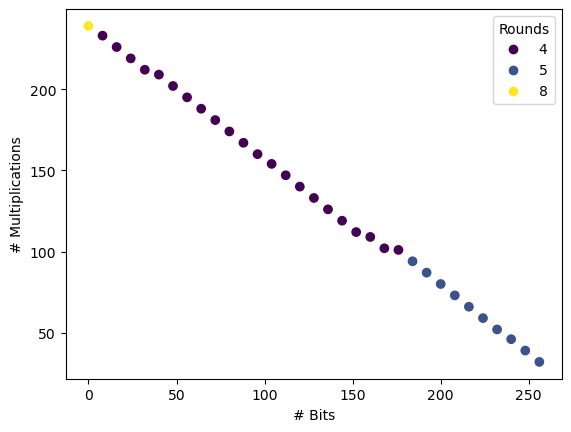

In [58]:
muls = [sum(r.required_additions()[:2]) for r in l]
print(muls)
bits = [8*r.required_additions()[2] for r in l]
print(bits)
rounds = [r.required_levels() for r in l]
print(rounds)
scatter = plt.scatter(bits, muls, c=rounds, norm='linear')
legend = plt.legend(*scatter.legend_elements(), title='Rounds')
plt.ylabel('# Multiplications')
plt.xlabel('# Bits')
plt.show()